## 1-1: 선택한 자산들의 수익률 상관계수 행렬(그래프)

[*********************100%***********************]  5 of 5 completed


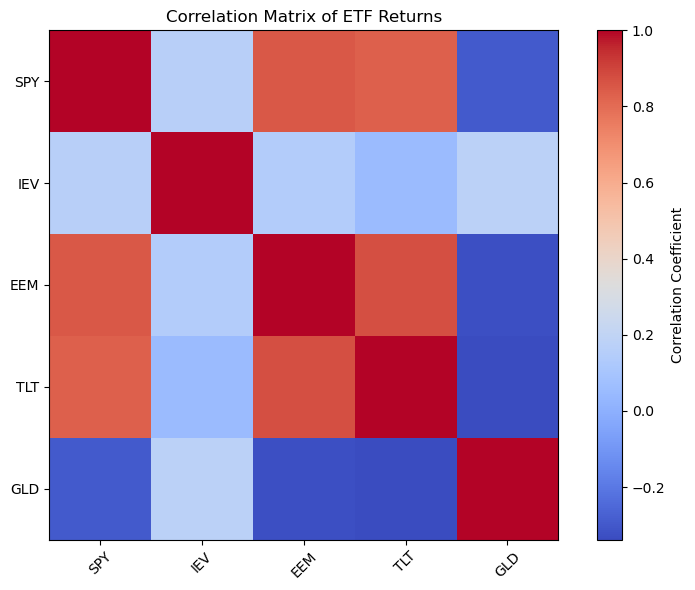

Correlation Matrix of ETF Returns:
Ticker       EEM       GLD       IEV       SPY       TLT
Ticker                                                  
EEM     1.000000  0.165167  0.849276  0.832353 -0.292752
GLD     0.165167  1.000000  0.145038  0.053345  0.177849
IEV     0.849276  0.145038  1.000000  0.873603 -0.325862
SPY     0.832353  0.053345  0.873603  1.000000 -0.337776
TLT    -0.292752  0.177849 -0.325862 -0.337776  1.000000


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: 데이터 다운로드
tickers = ['SPY', 'IEV', 'EEM', 'TLT', 'GLD']  # 선택된 ETF
start_date = '2007-01-05'
end_date = '2024-11-10'

# 야후 파이낸스에서 조정 종가 데이터 다운로드
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Step 2: 일간 수익률 계산
returns = data.pct_change().dropna()  # 일별 수익률 계산

# Step 3: 수익률 상관계수 행렬 계산
correlation_matrix = returns.corr()

# Step 4: 상관계수 행렬 시각화
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.title("Correlation Matrix of ETF Returns")
plt.xticks(range(len(tickers)), tickers, rotation=45)
plt.yticks(range(len(tickers)), tickers)
plt.tight_layout()
plt.show()

# Step 5: 상관계수 행렬 출력
print("Correlation Matrix of ETF Returns:")
print(correlation_matrix)

# 1-2: 효율적 프론티어 도출

[*********************100%***********************]  5 of 5 completed


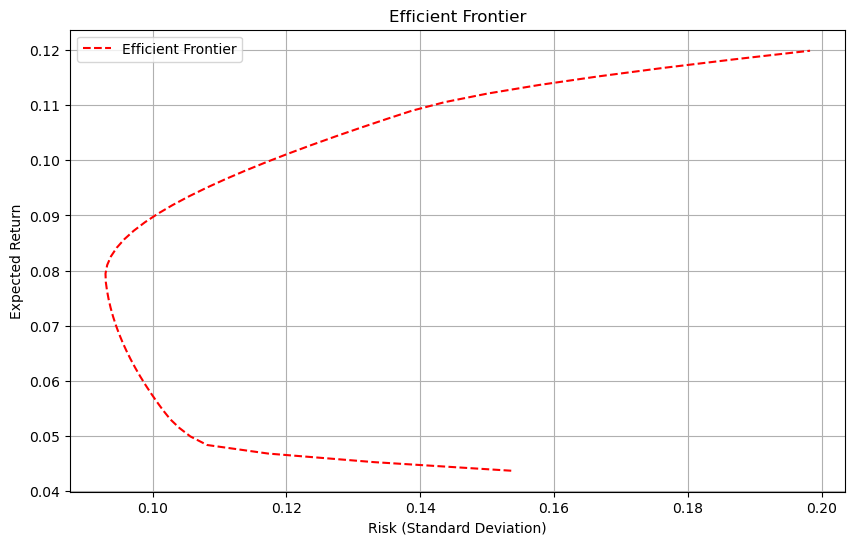

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Step 1: 데이터 다운로드
tickers = ['SPY', 'IEV', 'EEM', 'TLT', 'GLD']  # 선택된 ETF
start_date = '2007-01-05'
end_date = '2024-11-10'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
returns = data.pct_change().dropna()

mean_returns = returns.mean() * 252  # 연평균 수익률
cov_matrix = returns.cov() * 252     # 연평균 공분산
risk_free_rate = 0.03                # 무위험 이자율

# 포트폴리오 성능 계산 함수
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_std

# 최소분산 포트폴리오 최적화 함수
def minimize_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)[1]

# 효율적 프론티어 점들 계산
num_assets = len(mean_returns)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # 비중의 합은 1
bounds = tuple((0, 1) for _ in range(num_assets))
initial_weights = num_assets * [1. / num_assets]

target_returns = np.linspace(mean_returns.min(), mean_returns.max(), 50)
efficient_frontier = []

for target_return in target_returns:
    # 목표 기대수익률 제약조건 추가
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # 비중 합은 1
        {'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target_return}  # 목표 기대수익률
    ]
    result = minimize(minimize_volatility, initial_weights, args=(mean_returns, cov_matrix),
                      method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_frontier.append(result.fun)  # 최적화된 포트폴리오의 표준편차 저장

# 효율적 프론티어 시각화
plt.figure(figsize=(10, 6))
plt.plot(efficient_frontier, target_returns, 'r--', label='Efficient Frontier')
plt.title('Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid()
plt.show()

## 1-3: 효율적 프론티어 자산별 투자 비중 추이

[*********************100%***********************]  5 of 5 completed


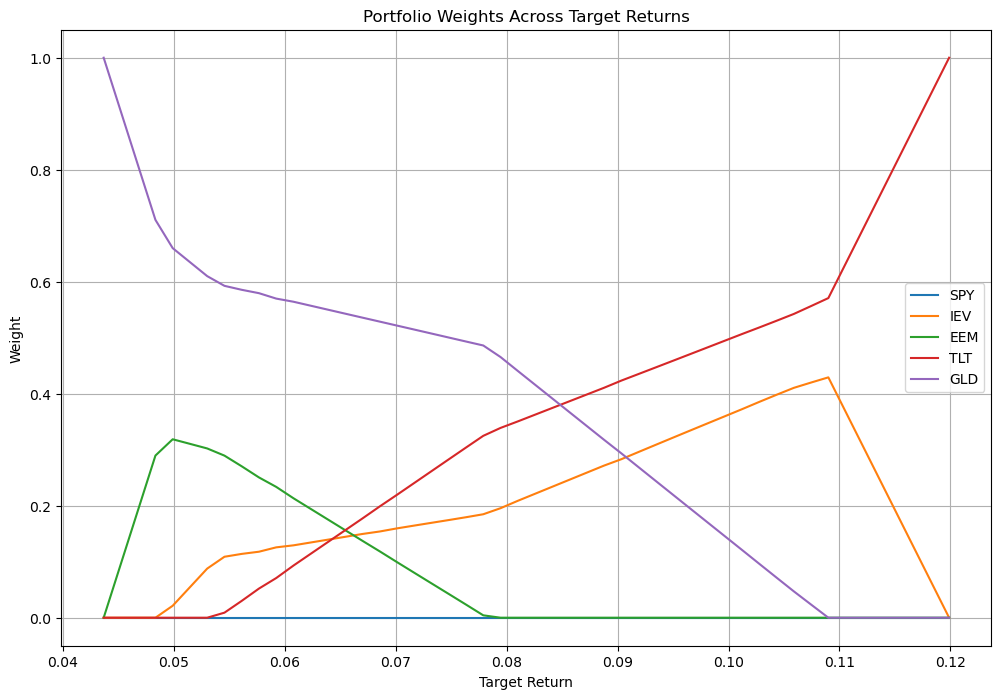

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Step 1: 데이터 다운로드
tickers = ['SPY', 'IEV', 'EEM', 'TLT', 'GLD']  # 선택된 ETF
start_date = '2007-01-05'
end_date = '2024-11-10'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
returns = data.pct_change().dropna()

mean_returns = returns.mean() * 252  # 연평균 수익률
cov_matrix = returns.cov() * 252     # 연평균 공분산
risk_free_rate = 0.03                # 무위험 이자율

# 포트폴리오 성능 계산 함수
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_std

# 최소분산 포트폴리오 최적화 함수
def minimize_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)[1]

# 효율적 프론티어의 포트폴리오 비중 계산 함수
def get_efficient_weights(target_return, mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # 비중 합은 1
        {'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target_return}  # 목표 기대수익률
    ]
    bounds = tuple((0, 1) for _ in range(num_assets))
    initial_weights = num_assets * [1. / num_assets]
    result = minimize(minimize_volatility, initial_weights, args=(mean_returns, cov_matrix),
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# Step 2: 목표 기대수익률에 따른 비중 계산
target_returns = np.linspace(mean_returns.min(), mean_returns.max(), 50)
efficient_weights = [get_efficient_weights(r, mean_returns, cov_matrix) for r in target_returns]

# Step 3: 자산별 투자 비중 추이 시각화
plt.figure(figsize=(12, 8))
for i, ticker in enumerate(tickers):
    plt.plot(target_returns, [w[i] for w in efficient_weights], label=ticker)
plt.title('Portfolio Weights Across Target Returns')
plt.xlabel('Target Return')
plt.ylabel('Weight')
plt.legend()
plt.grid()
plt.show()


## 2: 최소분산 포트폴리오(MVP)

[*********************100%***********************]  5 of 5 completed

Minimum Volatility Portfolio Weights:
SPY: 0.00%
IEV: 19.29%
EEM: 0.00%
TLT: 33.34%
GLD: 47.37%
Portfolio Return: 7.89%
Portfolio Risk (Std Dev): 9.29%


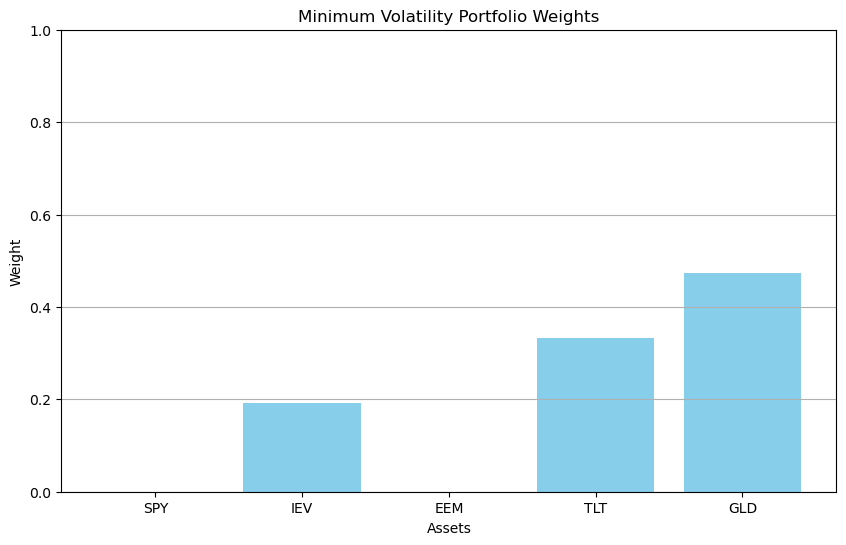

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Step 1: 데이터 다운로드
tickers = ['SPY', 'IEV', 'EEM', 'TLT', 'GLD']  # 선택된 ETF
start_date = '2007-01-05'
end_date = '2024-11-10'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
returns = data.pct_change().dropna()

mean_returns = returns.mean() * 252  # 연평균 수익률
cov_matrix = returns.cov() * 252     # 연평균 공분산
risk_free_rate = 0.03                # 무위험 이자율

# 포트폴리오 성능 계산 함수
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_std

# 최소분산 포트폴리오 최적화 함수
def minimize_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)[1]

# Step 2: 최소분산 포트폴리오 계산
num_assets = len(mean_returns)
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}  # 비중의 합은 1
bounds = tuple((0, 1) for _ in range(num_assets))
initial_weights = num_assets * [1. / num_assets]

result_min_vol = minimize(minimize_volatility, initial_weights, args=(mean_returns, cov_matrix),
                          method='SLSQP', bounds=bounds, constraints=constraints)

min_vol_weights = result_min_vol.x  # 최적화된 포트폴리오 비중
min_vol_return, min_vol_std = portfolio_performance(min_vol_weights, mean_returns, cov_matrix, risk_free_rate)

# Step 3: 최소분산 포트폴리오 결과 출력
print("Minimum Volatility Portfolio Weights:")
for ticker, weight in zip(tickers, min_vol_weights):
    print(f"{ticker}: {weight:.2%}")
print(f"Portfolio Return: {min_vol_return:.2%}")
print(f"Portfolio Risk (Std Dev): {min_vol_std:.2%}")

# Step 4: 최소분산 포트폴리오 비중 시각화
plt.figure(figsize=(10, 6))
plt.bar(tickers, min_vol_weights, color='skyblue')
plt.title('Minimum Volatility Portfolio Weights')
plt.ylabel('Weight')
plt.xlabel('Assets')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

## 3: 최대샤프 포트폴리오(Tangent Portfolio)

[*********************100%***********************]  5 of 5 completed

Maximum Sharpe Ratio Portfolio Weights:
SPY: 0.00%
IEV: 31.37%
EEM: 0.00%
TLT: 45.05%
GLD: 23.59%
Portfolio Return: 9.40%
Portfolio Risk (Std Dev): 10.62%
Sharpe Ratio: 0.60


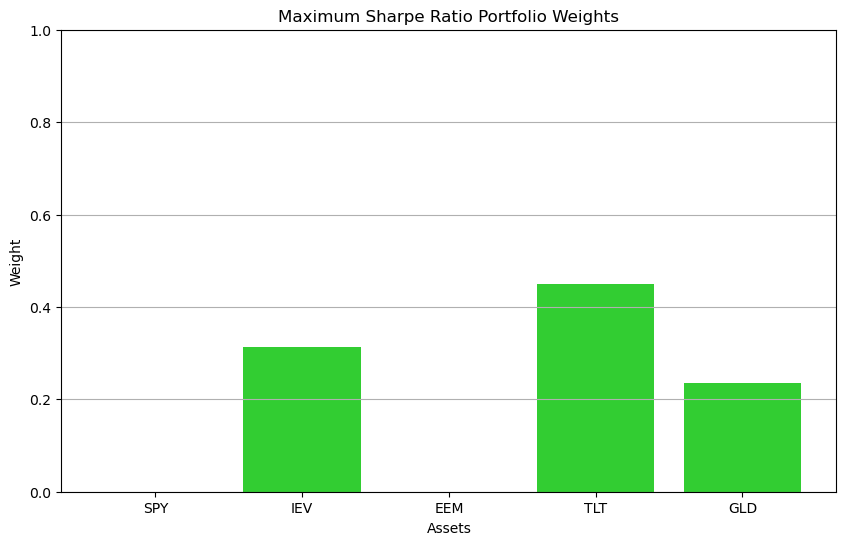

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Step 1: 데이터 다운로드
tickers = ['SPY', 'IEV', 'EEM', 'TLT', 'GLD']  # 선택된 ETF
start_date = '2007-01-05'
end_date = '2024-11-10'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
returns = data.pct_change().dropna()

mean_returns = returns.mean() * 252  # 연평균 수익률
cov_matrix = returns.cov() * 252     # 연평균 공분산
risk_free_rate = 0.03                # 무위험 이자율

# 포트폴리오 성능 계산 함수
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

# 최대샤프 포트폴리오 최적화 함수
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    return -portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)[2]

# Step 2: 최대샤프 포트폴리오 계산
num_assets = len(mean_returns)
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}  # 비중의 합은 1
bounds = tuple((0, 1) for _ in range(num_assets))
initial_weights = num_assets * [1. / num_assets]

result_max_sharpe = minimize(negative_sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix, risk_free_rate),
                             method='SLSQP', bounds=bounds, constraints=constraints)

max_sharpe_weights = result_max_sharpe.x  # 최적화된 포트폴리오 비중
max_sharpe_return, max_sharpe_std, max_sharpe_ratio = portfolio_performance(
    max_sharpe_weights, mean_returns, cov_matrix, risk_free_rate
)

# Step 3: 최대샤프 포트폴리오 결과 출력
print("Maximum Sharpe Ratio Portfolio Weights:")
for ticker, weight in zip(tickers, max_sharpe_weights):
    print(f"{ticker}: {weight:.2%}")
print(f"Portfolio Return: {max_sharpe_return:.2%}")
print(f"Portfolio Risk (Std Dev): {max_sharpe_std:.2%}")
print(f"Sharpe Ratio: {max_sharpe_ratio:.2f}")

# Step 4: 최대샤프 포트폴리오 비중 시각화
plt.figure(figsize=(10, 6))
plt.bar(tickers, max_sharpe_weights, color='limegreen')
plt.title('Maximum Sharpe Ratio Portfolio Weights')
plt.ylabel('Weight')
plt.xlabel('Assets')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


## 4: Risk Parity 포트폴리오

[*********************100%***********************]  5 of 5 completed


Risk Parity Portfolio Weights:
SPY: 10.52%
IEV: 21.23%
EEM: 13.00%
TLT: 16.44%
GLD: 38.82%


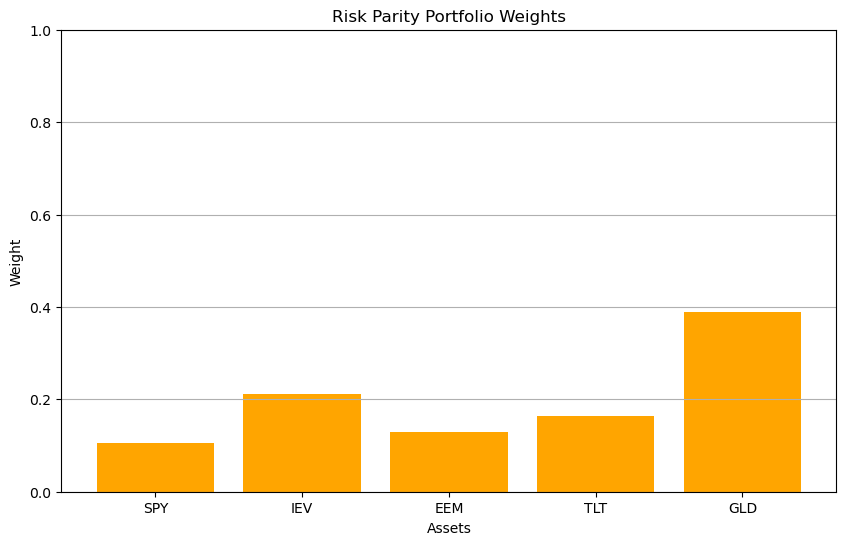

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Step 1: 데이터 다운로드
tickers = ['SPY', 'IEV', 'EEM', 'TLT', 'GLD']  # 선택된 ETF
start_date = '2007-01-05'
end_date = '2024-11-10'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
returns = data.pct_change().dropna()

mean_returns = returns.mean() * 252  # 연평균 수익률
cov_matrix = returns.cov() * 252     # 연평균 공분산
risk_free_rate = 0.03                # 무위험 이자율

# Risk Contribution 계산 함수
def calculate_risk_contribution(weights, cov_matrix):
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    marginal_risk = np.dot(cov_matrix, weights)
    risk_contribution = weights * marginal_risk / portfolio_volatility
    return risk_contribution

# Risk Parity 목표 함수
def risk_parity_objective(weights, cov_matrix):
    risk_contributions = calculate_risk_contribution(weights, cov_matrix)
    risk_diff = np.sum((risk_contributions - risk_contributions.mean()) ** 2)
    return risk_diff

# Step 2: Risk Parity 포트폴리오 계산
num_assets = len(mean_returns)
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}  # 비중의 합은 1
bounds = tuple((0, 1) for _ in range(num_assets))
initial_weights = num_assets * [1. / num_assets]

result_risk_parity = minimize(risk_parity_objective, initial_weights, args=(cov_matrix,),
                              method='SLSQP', bounds=bounds, constraints=constraints)

risk_parity_weights = result_risk_parity.x  # 최적화된 포트폴리오 비중

# Step 3: Risk Parity 포트폴리오 결과 출력
print("Risk Parity Portfolio Weights:")
for ticker, weight in zip(tickers, risk_parity_weights):
    print(f"{ticker}: {weight:.2%}")

# Step 4: Risk Parity 포트폴리오 비중 시각화
plt.figure(figsize=(10, 6))
plt.bar(tickers, risk_parity_weights, color='orange')
plt.title('Risk Parity Portfolio Weights')
plt.ylabel('Weight')
plt.xlabel('Assets')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


## 5: 최대 분산비율 포트폴리오

[*********************100%***********************]  5 of 5 completed

Maximum Diversification Ratio Portfolio Weights:
SPY: 3.90%
IEV: 18.08%
EEM: 7.49%
TLT: 24.47%
GLD: 46.05%


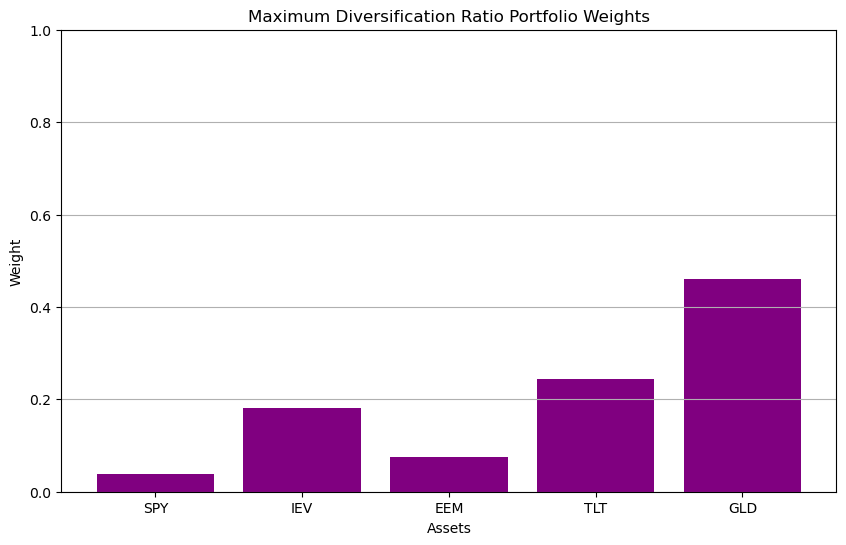

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Step 1: 데이터 다운로드
tickers = ['SPY', 'IEV', 'EEM', 'TLT', 'GLD']  # 선택된 ETF
start_date = '2007-01-05'
end_date = '2024-11-10'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
returns = data.pct_change().dropna()

mean_returns = returns.mean() * 252  # 연평균 수익률
cov_matrix = returns.cov() * 252     # 연평균 공분산
risk_free_rate = 0.03                # 무위험 이자율

# Diversification Ratio 계산 함수
def diversification_ratio(weights, cov_matrix):
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    asset_volatilities = np.sqrt(np.diag(cov_matrix))
    weighted_volatility = np.dot(weights, asset_volatilities)
    return -weighted_volatility / portfolio_volatility  # 음수로 변환하여 최적화

# Step 2: 최대 분산비율 포트폴리오 계산
num_assets = len(mean_returns)
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}  # 비중의 합은 1
bounds = tuple((0, 1) for _ in range(num_assets))
initial_weights = num_assets * [1. / num_assets]

result_md = minimize(diversification_ratio, initial_weights, args=(cov_matrix,),
                     method='SLSQP', bounds=bounds, constraints=constraints)

max_div_weights = result_md.x  # 최적화된 포트폴리오 비중

# Step 3: 최대 분산비율 포트폴리오 결과 출력
print("Maximum Diversification Ratio Portfolio Weights:")
for ticker, weight in zip(tickers, max_div_weights):
    print(f"{ticker}: {weight:.2%}")

# Step 4: 최대 분산비율 포트폴리오 비중 시각화
plt.figure(figsize=(10, 6))
plt.bar(tickers, max_div_weights, color='purple')
plt.title('Maximum Diversification Ratio Portfolio Weights')
plt.ylabel('Weight')
plt.xlabel('Assets')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

## 6번: 모형 비교 및 분석 코드

Portfolio Performance Metrics:
Minimum Volatility Portfolio: Return=7.89%, Risk=9.29%, Sharpe=0.53
Maximum Sharpe Portfolio: Return=9.40%, Risk=10.62%, Sharpe=0.60
Risk Parity Portfolio: Return=7.20%, Risk=10.39%, Sharpe=0.40
Maximum Diversification Portfolio: Return=7.38%, Risk=9.56%, Sharpe=0.46


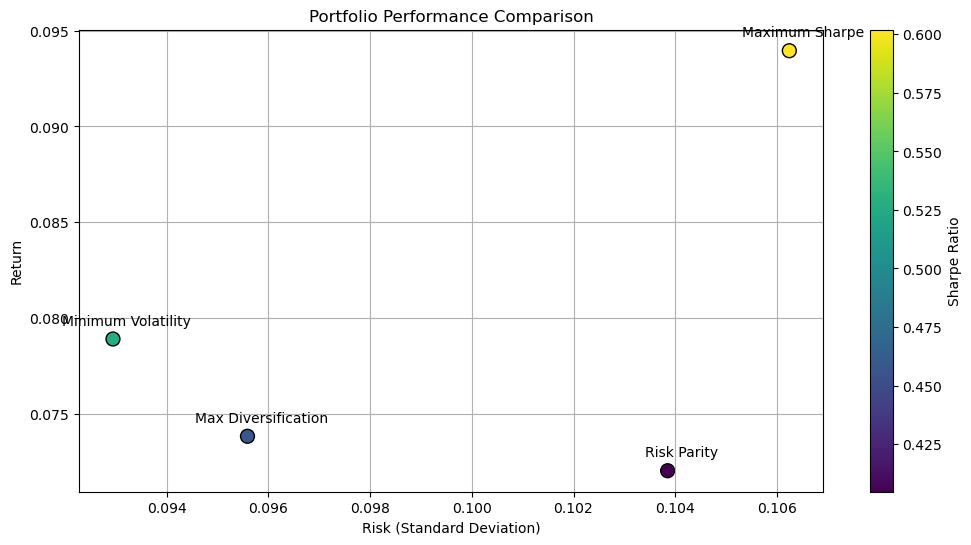

The most stable and balanced portfolio is: Maximum Sharpe


In [8]:
# Step 1: 포트폴리오 성과 계산 함수
def portfolio_metrics(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

# Step 2: 모든 포트폴리오의 성과 계산
min_vol_metrics = portfolio_metrics(min_vol_weights, mean_returns, cov_matrix, risk_free_rate)
max_sharpe_metrics = portfolio_metrics(max_sharpe_weights, mean_returns, cov_matrix, risk_free_rate)
risk_parity_metrics = portfolio_metrics(risk_parity_weights, mean_returns, cov_matrix, risk_free_rate)
max_div_metrics = portfolio_metrics(max_div_weights, mean_returns, cov_matrix, risk_free_rate)

# Step 3: 결과 비교 출력
print("Portfolio Performance Metrics:")
print(f"Minimum Volatility Portfolio: Return={min_vol_metrics[0]:.2%}, Risk={min_vol_metrics[1]:.2%}, Sharpe={min_vol_metrics[2]:.2f}")
print(f"Maximum Sharpe Portfolio: Return={max_sharpe_metrics[0]:.2%}, Risk={max_sharpe_metrics[1]:.2%}, Sharpe={max_sharpe_metrics[2]:.2f}")
print(f"Risk Parity Portfolio: Return={risk_parity_metrics[0]:.2%}, Risk={risk_parity_metrics[1]:.2%}, Sharpe={risk_parity_metrics[2]:.2f}")
print(f"Maximum Diversification Portfolio: Return={max_div_metrics[0]:.2%}, Risk={max_div_metrics[1]:.2%}, Sharpe={max_div_metrics[2]:.2f}")

# Step 4: 포트폴리오 성과 시각화
labels = ['Minimum Volatility', 'Maximum Sharpe', 'Risk Parity', 'Max Diversification']
returns = [min_vol_metrics[0], max_sharpe_metrics[0], risk_parity_metrics[0], max_div_metrics[0]]
risks = [min_vol_metrics[1], max_sharpe_metrics[1], risk_parity_metrics[1], max_div_metrics[1]]
sharpes = [min_vol_metrics[2], max_sharpe_metrics[2], risk_parity_metrics[2], max_div_metrics[2]]

# 성과 비교 그래프
plt.figure(figsize=(12, 6))

# Risk vs Return Scatter Plot
plt.scatter(risks, returns, c=sharpes, cmap='viridis', s=100, edgecolors='k')
for i, label in enumerate(labels):
    plt.annotate(label, (risks[i], returns[i]), textcoords="offset points", xytext=(10,10), ha='center')

plt.title('Portfolio Performance Comparison')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid()
plt.show()

# Step 5: 모형 선택
# 가장 안정적이고 균형 잡힌 포트폴리오를 선택하는 기준
# 예시: Sharpe Ratio가 높은 포트폴리오를 선택
best_portfolio = labels[np.argmax(sharpes)]
print(f"The most stable and balanced portfolio is: {best_portfolio}")
